# Variable TR Height in EBTEL
Test implemention Steve's variable transition height method in EBTEL 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord
from sunpy.coordinates import HeliographicStonyhurst, Helioprojective

import synthesizAR
import synthesizAR.extrapolate
from synthesizAR.interfaces.ebtel import EbtelInterface

%matplotlib inline

## Extrapolate Field and Trace Fieldlines

In [2]:
shape = [ 100, 100] * u.pixel
obs = SkyCoord(lon=0.*u.deg,lat=0.*u.deg,radius=const.au,frame=HeliographicStonyhurst)
blc = SkyCoord(-50 * u.arcsec, -50 * u.arcsec,frame=Helioprojective(observer=obs))
trc = SkyCoord(50 * u.arcsec, 50 * u.arcsec, frame=Helioprojective(observer=obs))
centers = SkyCoord([15, -15,]*u.arcsec,[0, 0,]*u.arcsec,frame=Helioprojective(observer=obs))
sigmas = u.Quantity([[5, 5], [5, 5],],'arcsec')
amplitudes = u.Quantity([1e3, -1e3,], 'Gauss')

In [3]:
magnetogram = synthesizAR.extrapolate.synthetic_magnetogram(blc, trc, shape, centers, sigmas, amplitudes, observer=obs)

In [4]:
shape_z = 100 * u.pixel
width_z = (magnetogram.scale.axis1 * shape_z).to(u.radian).value * magnetogram.dsun

In [5]:
extrapolator = synthesizAR.extrapolate.PotentialField(magnetogram, width_z, shape_z)
B_field = extrapolator.extrapolate()

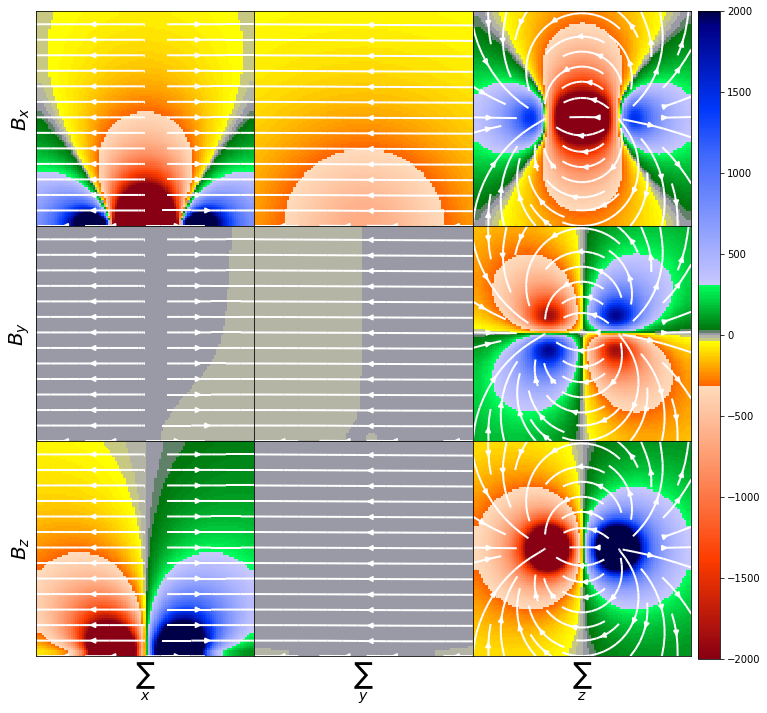

In [6]:
synthesizAR.extrapolate.peek_projections(B_field)

In [7]:
fieldlines = extrapolator.trace_fieldlines(B_field, 250, notebook=True)

yt : [INFO     ] 2018-06-08 16:53:21,463 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-06-08 16:53:21,464 Parameters: domain_dimensions         = [100 100 100]
yt : [INFO     ] 2018-06-08 16:53:21,465 Parameters: domain_left_edge          = [-3.60943875e+09 -3.60943778e+09  0.00000000e+00]
yt : [INFO     ] 2018-06-08 16:53:21,466 Parameters: domain_right_edge         = [3.60963607e+09 3.60963510e+09 7.25270944e+09]
yt : [INFO     ] 2018-06-08 16:53:21,467 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2018-06-08 16:53:22,742 AMRKDTree rebuilt, Final Volume: 3.779751e+29
Streamlining: 100%|██████████| 250/250 [00:00<00:00, 388.61it/s]
yt : [INFO     ] 2018-06-08 16:53:24,269 AMRKDTree rebuilt, Final Volume: 3.779751e+29
Streamlining: 100%|██████████| 144/144 [00:00<00:00, 296.74it/s]
yt : [INFO     ] 2018-06-08 16:53:25,572 AMRKDTree rebuilt, Final Volume: 3.779751e+29
Streamlining: 100%|██████████| 81/81 [00:00<00:00, 259.68it/s]
yt : [INFO     ] 2018-

FloatProgress(value=0.0)

In [8]:
active_region = synthesizAR.Field(magnetogram, fieldlines)

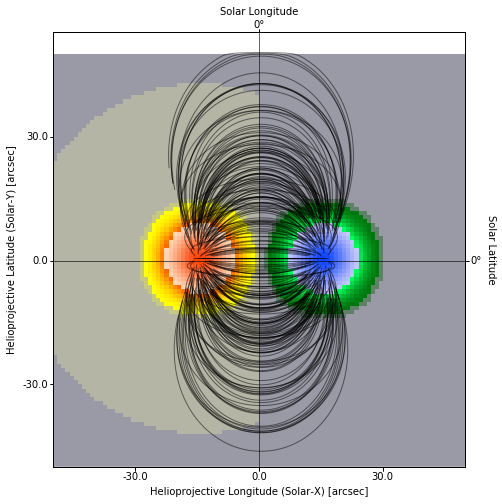

In [9]:
active_region.peek(line_frequency=1)

## Modified EBTEL Interface to include Variable TR Height

In [ ]:
class EBTELVaryingTRHeightInterface(EbtelInterface):
    
    def load_results(self,loop):
        t,Te,Ti,n,v = super().load_results(loop)
        # Do stuff here
        return t,Te,Ti,n,v